In [1]:
import perceval as pcvl
import numpy as np
import matplotlib.pyplot as plt
import itertools
from Functions import *
import matplotlib.pyplot as plt
import scipy as sc
from scipy import signal
from tabulate import tabulate
from Convolution import createWaves
from CNOTcalculator import calculateCNOT

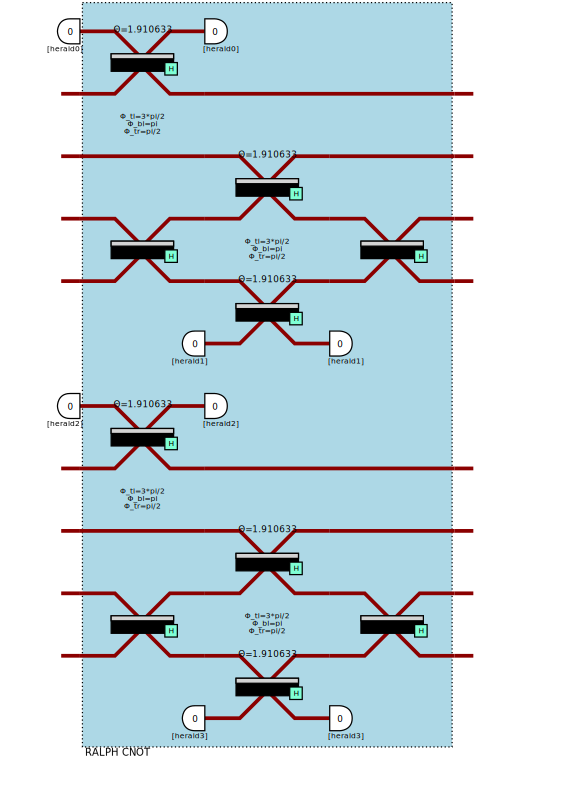

In [2]:
n = 3 #Nombre de modes spatiaux
m = 3 #Nombre de modes internes
k = 3 #Nombre de photon
cnot = pcvl.Circuit(12, name="Ralph CNOT")
cnot.add((0, 1), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((3, 4), pcvl.BS.H())
cnot.add((2, 3), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((4, 5), pcvl.BS.H(pcvl.BS.r_to_theta(1/3)))
cnot.add((3, 4), pcvl.BS.H())
#first copy
cnot.add((6, 7), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((9, 10), pcvl.BS.H())
cnot.add((8, 9), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((10, 11), pcvl.BS.H(pcvl.BS.r_to_theta(1/3)))
cnot.add((9, 10), pcvl.BS.H())

p = pcvl.Processor("Naive", cnot)
#p.set_postprocess(lambda s: (s[1] or s[2] or s[7] or s[8]) and (s[3] or s[4] or s[9] or s[10]))
p.add_herald(0, 0)
p.add_herald(5, 0)
p.add_herald(6, 0)
p.add_herald(11, 0)

pcvl.pdisplay(p, recursive = True)




In [3]:
TableValue,compareVal,realValMax,realValMin,delayVal = calculateCNOT(p) #[0,1,1,0] == |10>

0.997066*|0,1,1,0,0,0,0,0>+0.076549*|0,1,0,0,0,0,1,0>
|1,0,1,0> 0
|1,0,0,1> 0
|0,1,1,0> 0.0019532328136085512
|0,1,0,1> 0.4980467671863916
0.928041*|0,1,1,0,0,0,0,0>+0.372477*|0,1,0,0,0,0,1,0>
|1,0,1,0> 0
|1,0,0,1> 0
|0,1,1,0> 0.04624645588358954
|0,1,0,1> 0.45375354411641045
0.862379*|0,1,1,0,0,0,0,0>+0.506263*|0,1,0,0,0,0,1,0>
|1,0,1,0> 0
|1,0,0,1> 0
|0,1,1,0> 0.08543417498685693
|0,1,0,1> 0.4145658250131431
0.811707*|0,1,1,0,0,0,0,0>+0.584065*|0,1,0,0,0,0,1,0>
|1,0,1,0> 0
|1,0,0,1> 0
|0,1,1,0> 0.11371077431306287
|0,1,0,1> 0.38628922568693724
0.707241*|0,1,1,0,0,0,0,0>+0.706972*|0,1,0,0,0,0,1,0>
|1,0,1,0> 0
|1,0,0,1> 0
|0,1,1,0> 0.16660328880809602
|0,1,0,1> 0.333396711191904
0.594557*|0,1,1,0,0,0,0,0>+0.804053*|0,1,0,0,0,0,1,0>
|1,0,1,0> 0
|1,0,0,1> 0
|0,1,1,0> 0.21550066549426333
|0,1,0,1> 0.28449933450573683
0.491683*|0,1,1,0,0,0,0,0>+0.870774*|0,1,0,0,0,0,1,0>
|1,0,1,0> 0
|1,0,0,1> 0
|0,1,1,0> 0.2527491325124125
|0,1,0,1> 0.24725086748758757
0.423991*|0,1,1,0,0,0,0,0>+0.905667*|

[0.3262157686685896, 8.427415610921344, 16.539841281311965, 23.072866831244028, 38.198807128899716, 58.1518225709533, 78.48797956716226, 94.47494814804486, 120.23891949149129, 139.0909882324122]
[0.8642579622718675, 0.8047923390521488, 0.7054251404774808, 0.6339745050794477, 0.5461695118517895, 0.4766937733580512, 0.43860164512338423, 0.4189242141122594, 0.40579429674169615, 0.3961424802780103]
[0.8406719080700941, 0.7745697232329014, 0.6666681805382721, 0.5867515037344204, 0.48462078230728817, 0.4079839932507154, 0.36419810954361737, 0.34285192323031677, 0.3238514845257066, 0.3143758125639678]
[0.4980467671863916, 0.45375354411641045, 0.4145658250131431, 0.38628922568693724, 0.333396711191904, 0.28449933450573683, 0.24725086748758757, 0.22658937000465557, 0.20495746603310472, 0.19420809850360812]


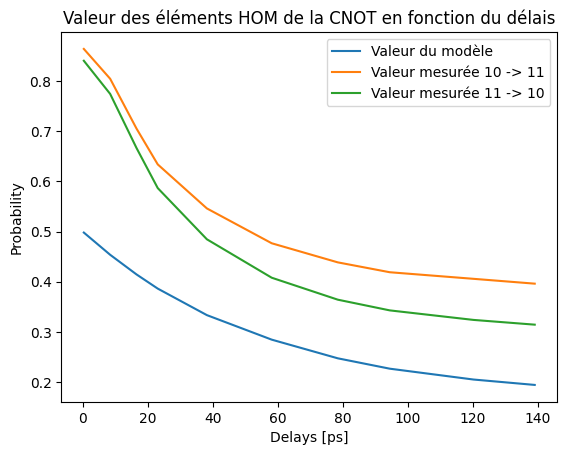

In [4]:
print(delayVal)
print(realValMax)
print(realValMin)

plt.plot(delayVal,np.array(compareVal),label = 'Valeur du modèle')
plt.plot(delayVal,realValMax,label = 'Valeur mesurée 10 -> 11')
plt.plot(delayVal,realValMin,label = 'Valeur mesurée 11 -> 10')
plt.xlabel('Delays [ps]')
plt.ylabel('Probability')
plt.title(r'Valeur des éléments HOM de la CNOT en fonction du délais')
plt.legend()
print(compareVal)

In [5]:
print(TableValue)

[{<perceval.utils.statevector.BasicState object at 0x7f81dbb4e590>: 0.0, <perceval.utils.statevector.BasicState object at 0x7f81dc2e2a40>: 0.0, <perceval.utils.statevector.BasicState object at 0x7f81dc2e2a90>: 0.076447975374098, <perceval.utils.statevector.BasicState object at 0x7f81dc2e2ae0>: 0.04855202462590203}]
